In [62]:
import pandas as pd

# Replace 'your_file.csv' with the actual file path or URL
file_path = '/Users/samdvorin/Desktop/code/506/ds-boston-311-animal-reports/sp24-team-c/data/animal_related_complaints_2011_2024.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, low_memory=False)

# Now 'df' contains your data as a pandas DataFrame

column_names_list = df.columns.tolist()
print(column_names_list)
df.head(1)

def get_time_of_day(hour):
    if 6 <= hour < 12:
        return '06:00 - 12:00'
    elif 12 <= hour < 18:
        return '12:00 - 18:00'
    elif 18 <= hour < 24:
        return '18:00 - 00:00'
    else:
        return '00:00 - 06:00' 


['_id', 'case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time', 'case_status', 'closure_reason', 'case_title', 'subject', 'reason', 'type', 'queue', 'department', 'submitted_photo', 'closed_photo', 'location', 'fire_district', 'pwd_district', 'city_council_district', 'police_district', 'neighborhood', 'neighborhood_services_district', 'ward', 'precinct', 'location_street_name', 'location_zipcode', 'latitude', 'longitude', 'geom_4326', 'source']


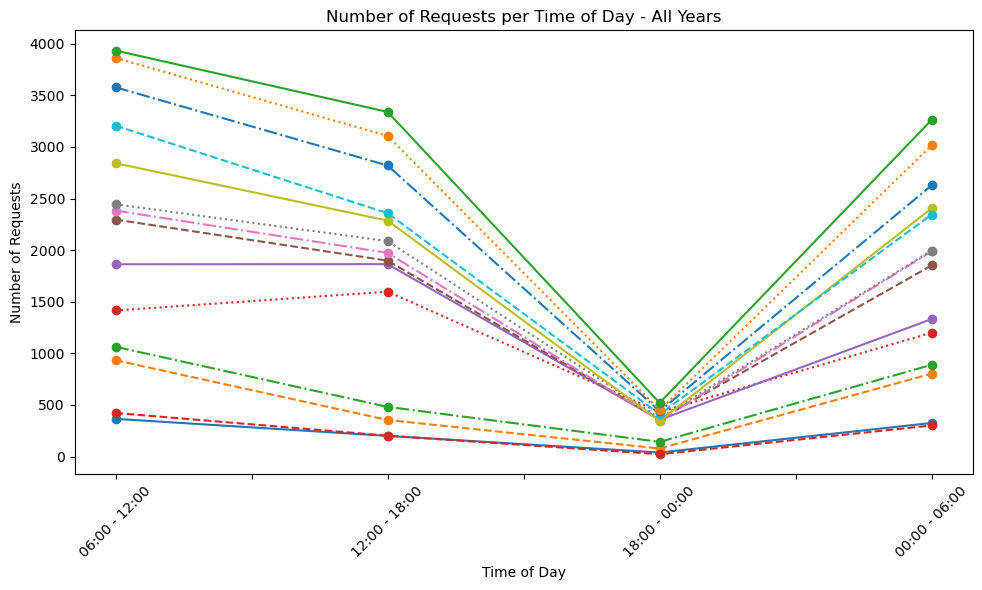

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already defined

# Convert the 'open_dt' column to datetime type
df['open_dt'] = pd.to_datetime(df['open_dt'])

# Extract the year from the 'open_dt' column
df['year'] = df['open_dt'].dt.year

# Create a new column 'time_of_day' based on the 'open_dt' column
df['time_of_day'] = df['open_dt'].dt.hour.apply(get_time_of_day)

# Create lists to store time of day counts for each year
all_years_counts = []

# Create a list to store legend labels
legend_labels = []

# Loop through each year and save the corresponding plot
for year in range(2011, 2025):
    # Filter data for the current year
    year_data = df[df['year'] == year]
    
    # Bucket count of requests based on the time of day
    time_of_day_counts = year_data['time_of_day'].value_counts()

    # Reorder the index to match the desired order
    time_of_day_counts = time_of_day_counts.reindex([
        '06:00 - 12:00',  # Morning (6 AM to 12 PM)
        '12:00 - 18:00',  # Noon (12 PM to 6 PM)
        '18:00 - 00:00',  # Night (6 PM to 12 AM)
        '00:00 - 06:00'   # Late Night (12 AM to 6 AM)
    ])
    
    all_years_counts.append(time_of_day_counts)
    legend_labels.append(str(year))

    # Plot the time of day counts for the current year and trends
    fig, ax = plt.subplots(figsize=(10, 6))
    time_of_day_counts.plot(kind='line', marker='o', ax=ax, color='green', label=str(year))

    ax.set_title(f'Time of Day Counts of Requests - {year}')
    ax.set_xlabel('Time of Day')
    ax.set_ylabel('Number of Requests')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(False)  # Remove grid lines
    ax.legend()

    # Annotate points with the exact count
    for i, v in enumerate(time_of_day_counts):
        ax.text(i, v + 0.5, f'{v}', ha='center')

    plt.tight_layout()
    plt.savefig(f'countPerTimeOfDay_{year}.png')  # Save the graph as an image
    plt.close()  # Close the current plot to free up resources

# Plot all years' counts at the bottom
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each year's counts
line_styles = ['-', '--', '-.', ':']  # Add more styles as needed
for i, year_counts in enumerate(all_years_counts):
    linestyle = line_styles[i % len(line_styles)]  # Cycle through styles
    year_counts.plot(kind='line', marker='o', ax=ax, linestyle=linestyle, label=f'{2011 + i}')

ax.set_title('Number of Requests per Time of Day - All Years')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Number of Requests')
ax.tick_params(axis='x', rotation=45)
ax.grid(False)  # Remove grid lines

# # Place the legend above the graph
# ax.legend(loc='center left', bbox_to_anchor=(1.5, 1.15), fancybox=True, ncol=3)

# Adjust the right margin to avoid squishing
plt.subplots_adjust(right=0.8)

# Display the final plot
plt.tight_layout()
plt.savefig('countPerTimeOfDay_AllYears.png')  # Save the graph as an image
plt.show()


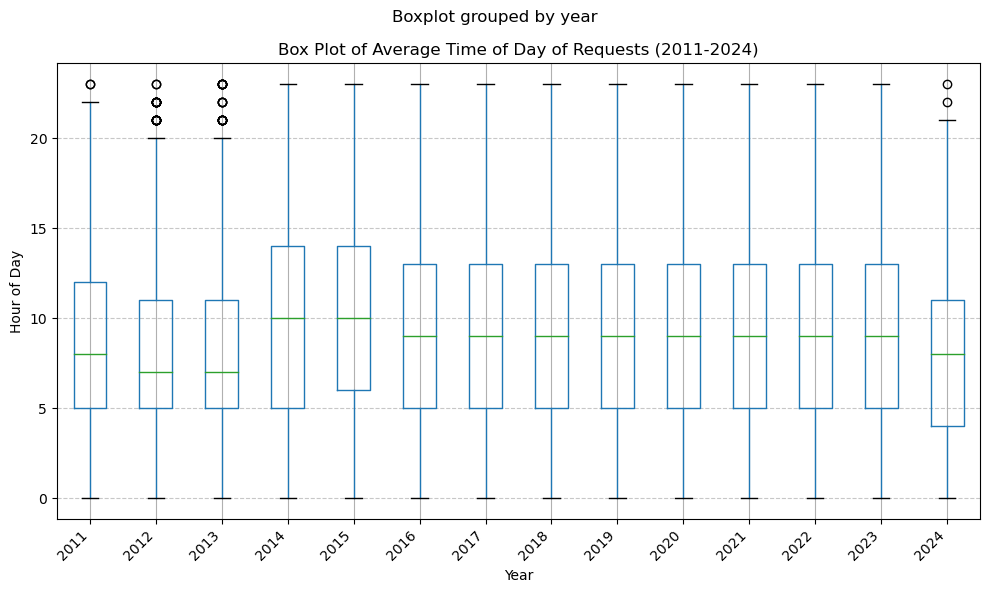

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Convert the 'open_dt' column to datetime type
df['open_dt'] = pd.to_datetime(df['open_dt'])

# Extract the year from the 'open_dt' column
df['year'] = df['open_dt'].dt.year

# Define a function to map hours to time of day
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning (6 AM to 12 PM)'
    elif 12 <= hour < 18:
        return 'Noon (12 PM to 6 PM)'
    elif 18 <= hour < 24:
        return 'Night (6 PM to 12 AM)'
    else:
        return 'Late Night (12 AM to 6 AM)'

# Extract the hour from the 'open_dt' column and map to time of day
df['hour'] = df['open_dt'].dt.hour
df['time_of_day'] = df['hour'].apply(get_time_of_day)

# Calculate the average time of day for each year
average_time_of_day = df.groupby('year')['hour'].mean()

# Plot the box plot for average time of day
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='hour', by='year', ax=ax)
ax.set_title('Box Plot of Average Time of Day of Requests (2011-2024)')
ax.set_xlabel('Year')
ax.set_ylabel('Hour of Day')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('averageTimeOfDayBoxPlot.png')  # Save the graph as an image
plt.show()


/var/folders/mf/txv8p7fx2yz68v4bx9pfbxf80000gn/T/ipykernel_9980/2183501311.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['month'] = year_data['open_dt'].dt.month
/var/folders/mf/txv8p7fx2yz68v4bx9pfbxf80000gn/T/ipykernel_9980/2183501311.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['season'] = year_data['month'].apply(get_season)


KeyError: 'season'

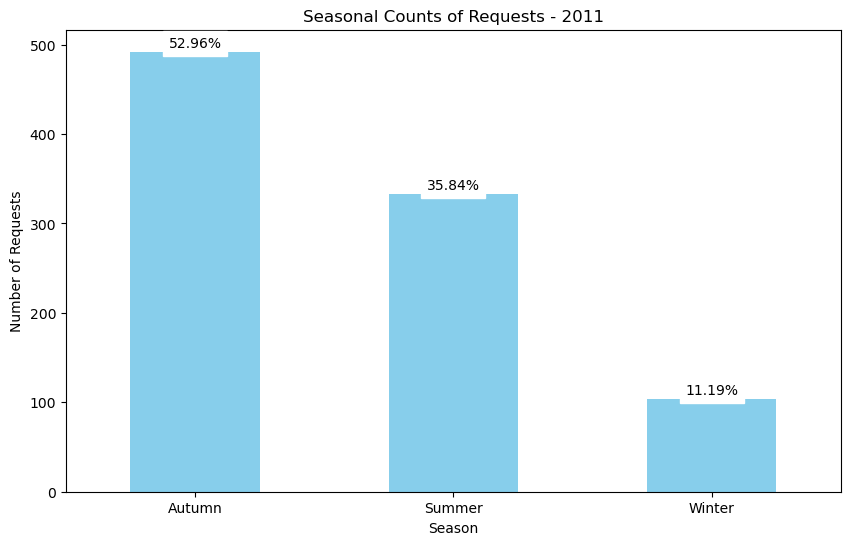

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Function to map months to seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Convert the 'open_dt' column to datetime type
df['open_dt'] = pd.to_datetime(df['open_dt'])

# Extract the year from the 'open_dt' column
df['year'] = df['open_dt'].dt.year

# Loop through each year and save the corresponding plot for seasonal counts
for year in range(2011, 2026):
    # Filter data for the current year
    year_data = df[df['year'] == year]
    
    # Extract the month from the 'open_dt' column and map to seasons
    year_data['month'] = year_data['open_dt'].dt.month
    year_data['season'] = year_data['month'].apply(get_season)

    # Bucket count of requests based on the season
    season_counts = year_data['season'].value_counts().sort_index()

    # Plot the seasonal counts with trends from the year before and after
    plt.figure(figsize=(10, 6))
    ax = season_counts.plot(kind='bar', color='skyblue', label=str(year))
    plt.title(f'Seasonal Counts of Requests - {year}')
    plt.xlabel('Season')
    plt.ylabel('Number of Requests')
    plt.xticks(rotation=0)

    # Calculate and annotate percentages
    total_requests_seasonal = season_counts.sum()
    for i, v in enumerate(season_counts):
        percentage = (v / total_requests_seasonal) * 100
        ax.text(i, v + 5, f'{percentage:.2f}%', ha='center', bbox=dict(facecolor='white', edgecolor='white'))

    # Add trend from the year before
    if year - 1 in df['year'].unique():
        year_before_data = df[df['year'] == year - 1]
        season_counts_before = year_before_data['season'].value_counts().sort_index()
        season_counts_before = season_counts_before.reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
        season_counts_before.plot(kind='bar', ax=ax, color='none', hatch='//', edgecolor='black', label=str(year - 1) + ' (Year Before)')

    # Add trend from the year after
    if year + 1 in df['year'].unique():
        year_after_data = df[df['year'] == year + 1]
        season_counts_after = year_after_data['season'].value_counts().sort_index()
        season_counts_after = season_counts_after.reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
        season_counts_after.plot(kind='bar', ax=ax, color='none', hatch='\\\\', edgecolor='red', label=str(year + 1) + ' (Year After)')

    plt.tight_layout()
    plt.legend()
    plt.savefig(f'countPerSeason_{year}.png')  # Save the graph as an image
    plt.close()  # Close the current plot to free up resources


/var/folders/mf/txv8p7fx2yz68v4bx9pfbxf80000gn/T/ipykernel_9980/3091439479.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['month'] = year_data['open_dt'].dt.month_name()
/var/folders/mf/txv8p7fx2yz68v4bx9pfbxf80000gn/T/ipykernel_9980/3091439479.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['month'] = year_data['open_dt'].dt.month_name()
/var/folders/mf/txv8p7fx2yz68v4bx9pfbxf80000gn/T/ipykernel_9980/3091439479.py:18: SettingWithCopyWarning: 
A value is trying to be set on a 

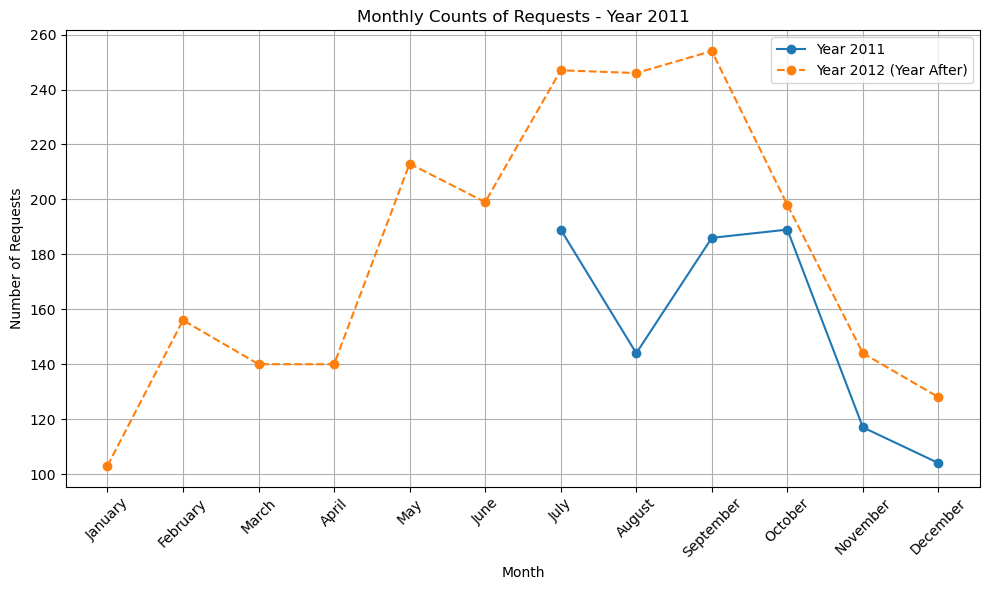

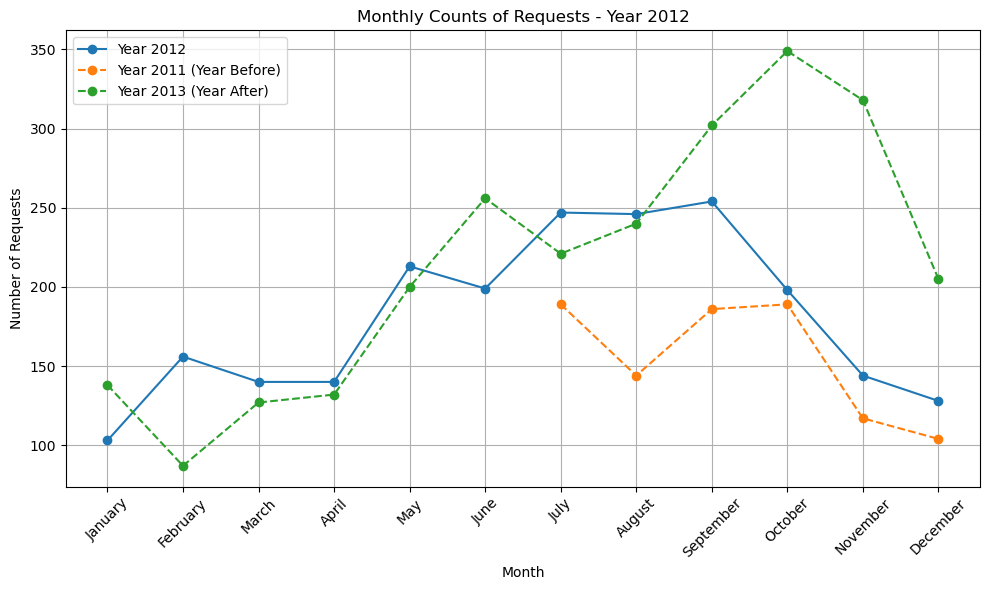

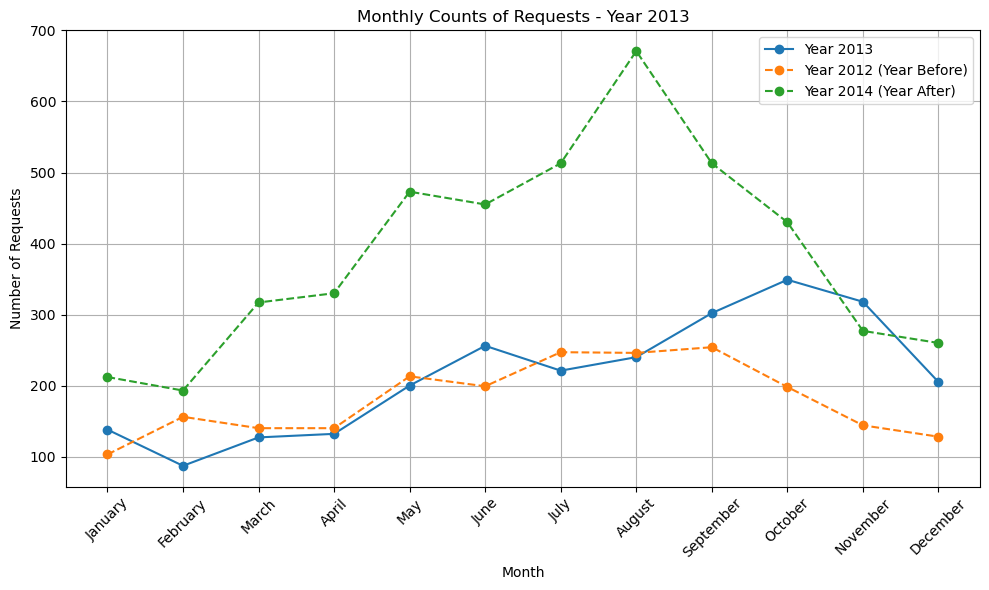

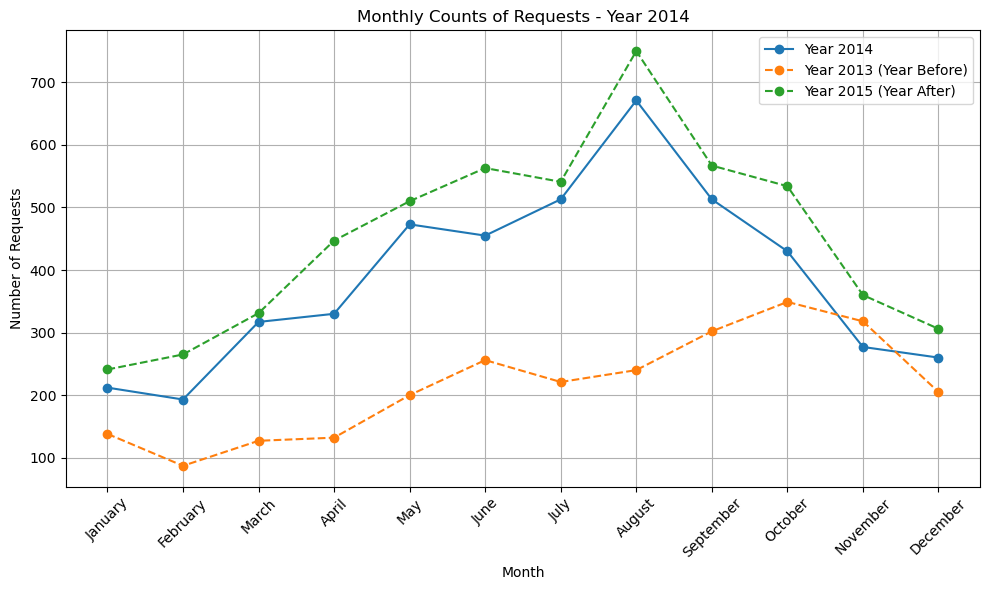

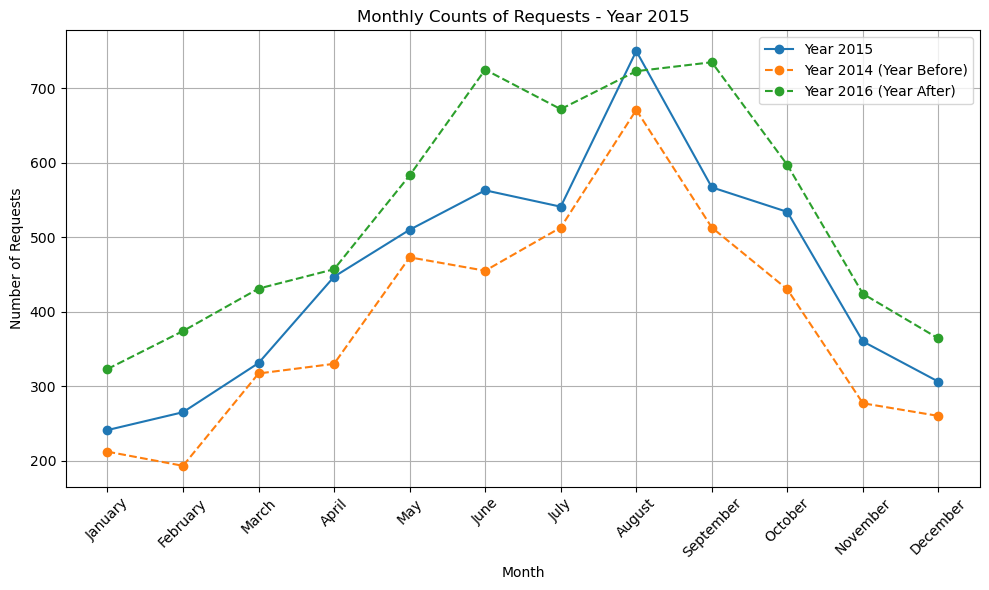

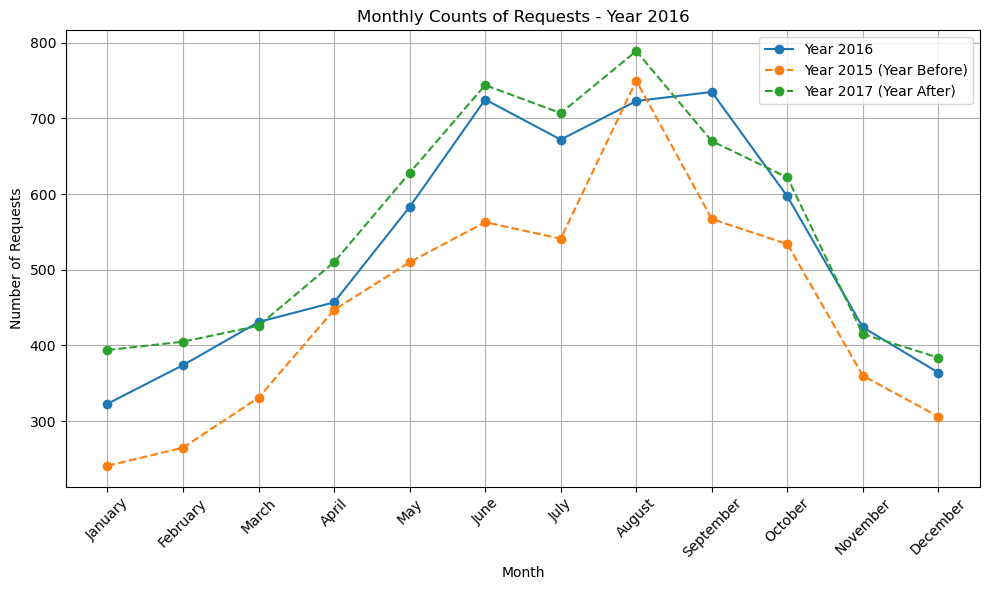

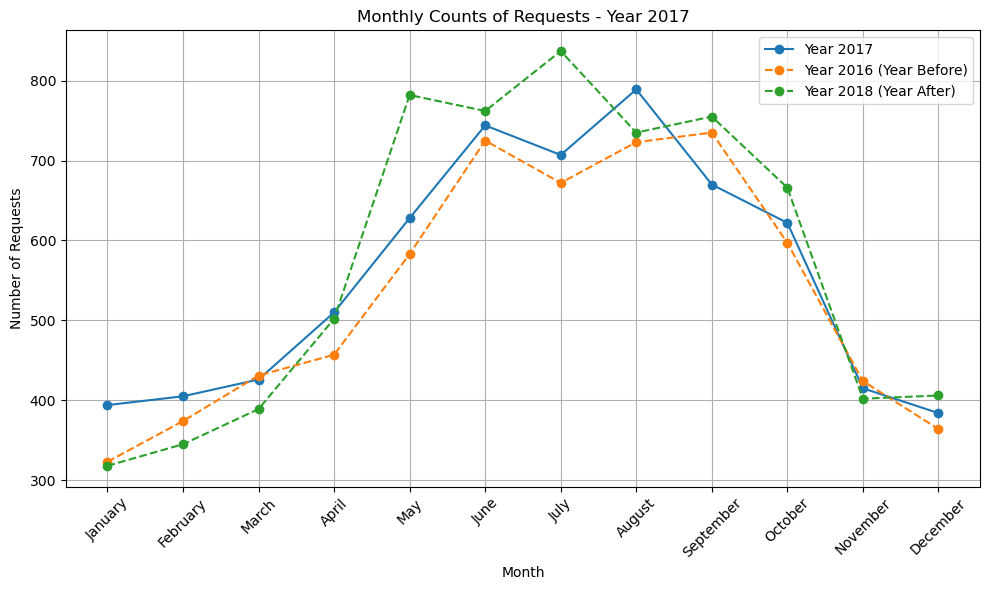

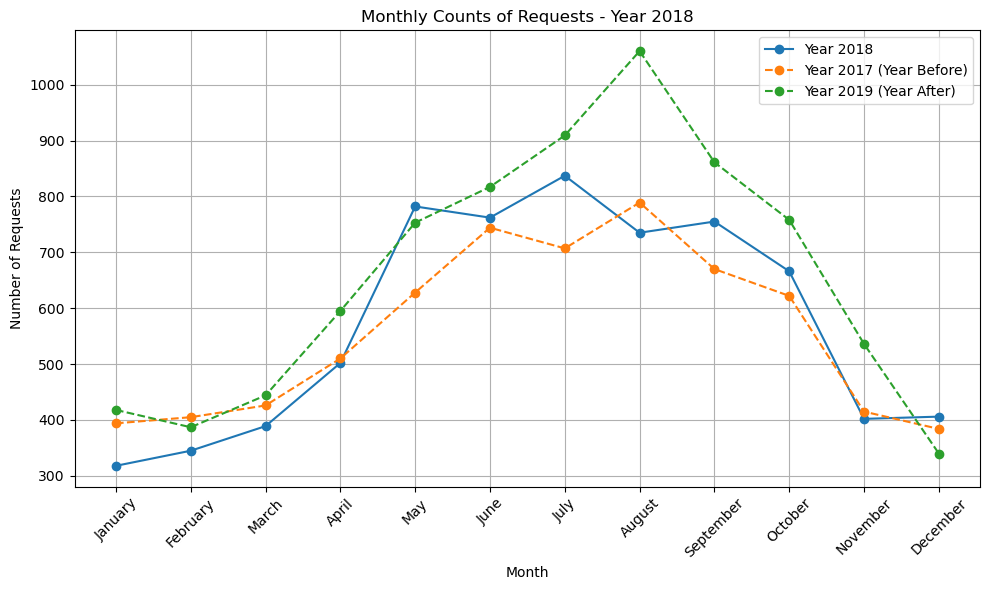

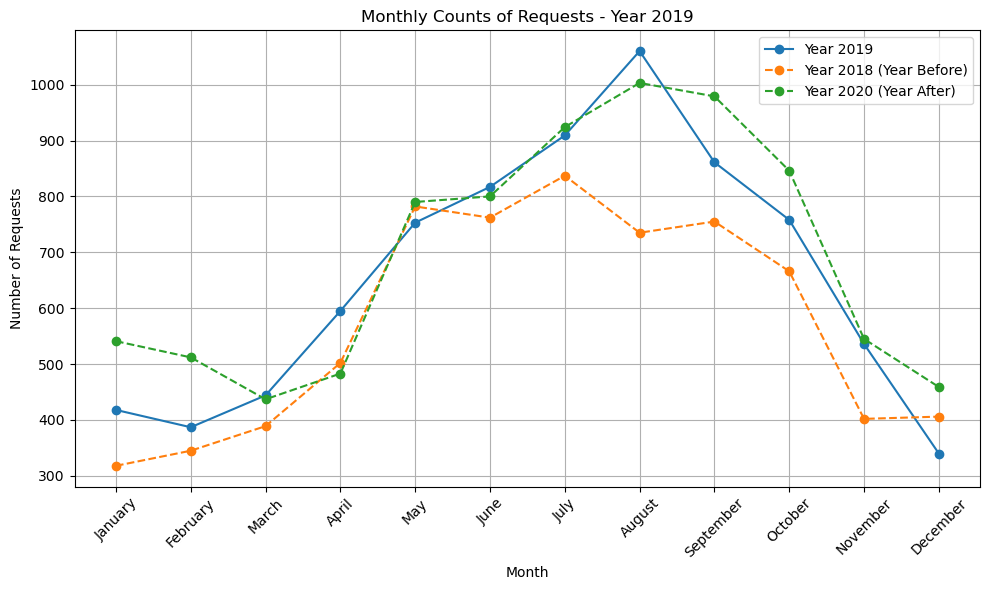

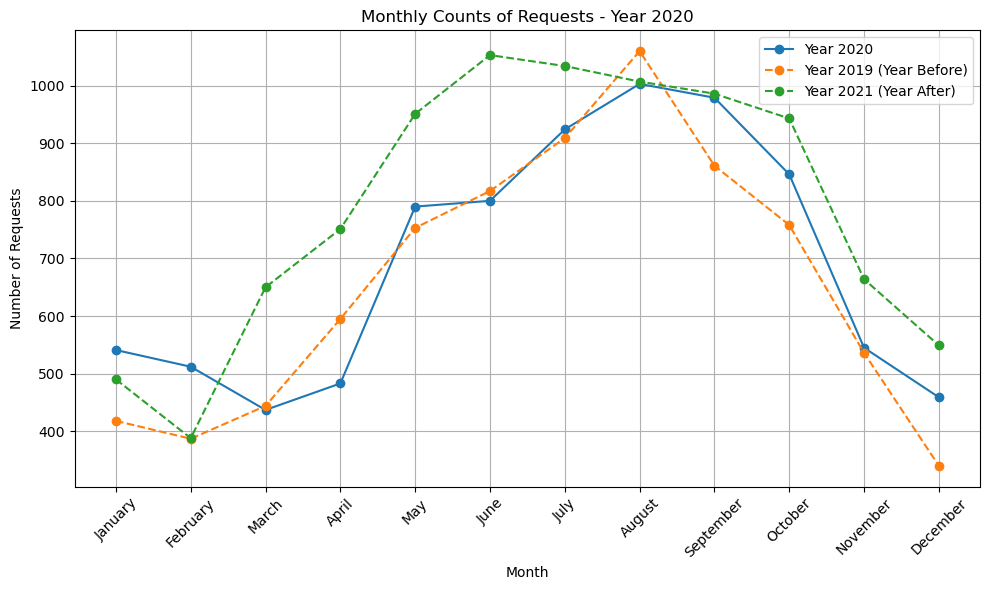

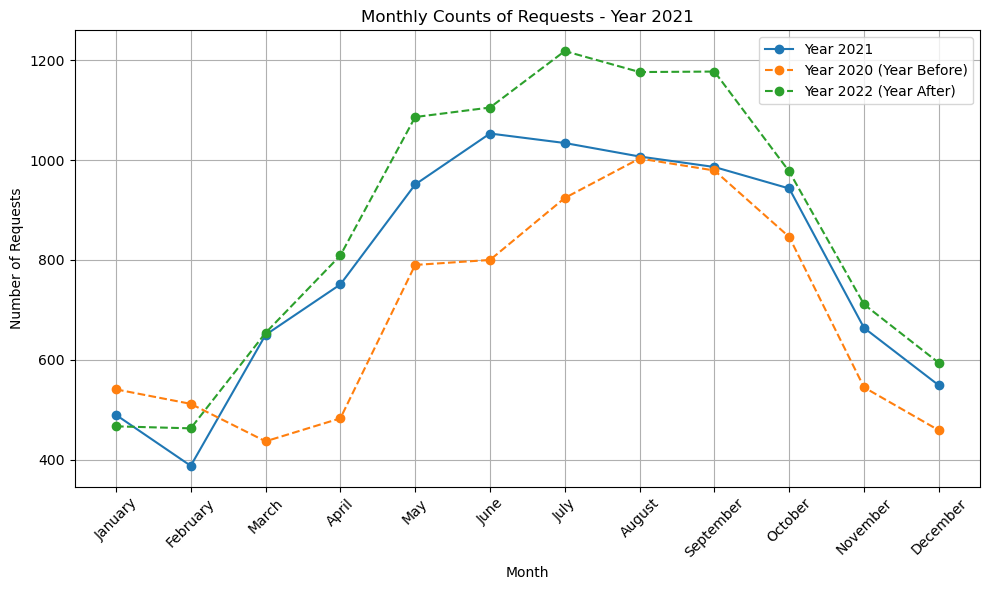

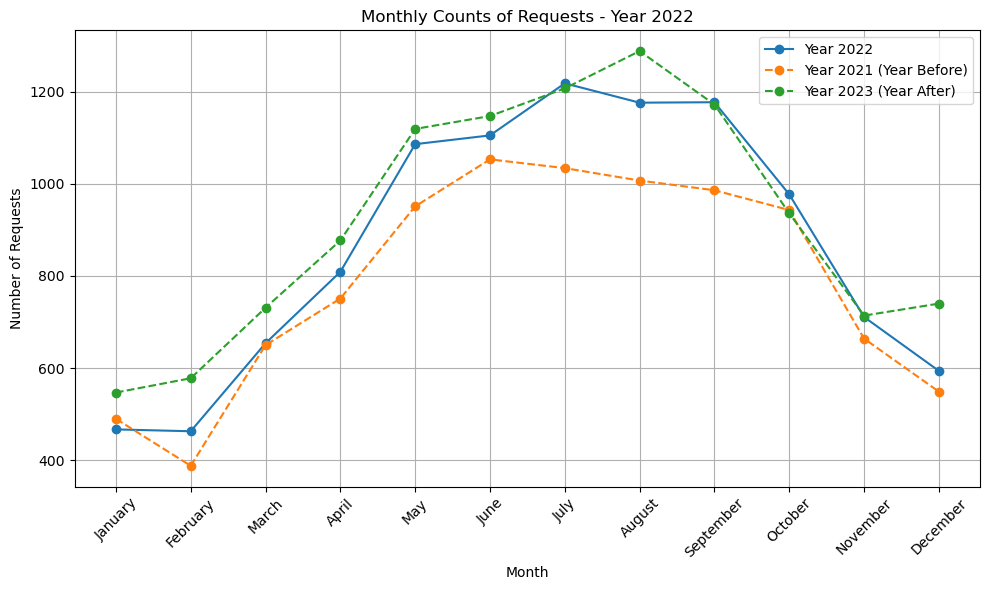

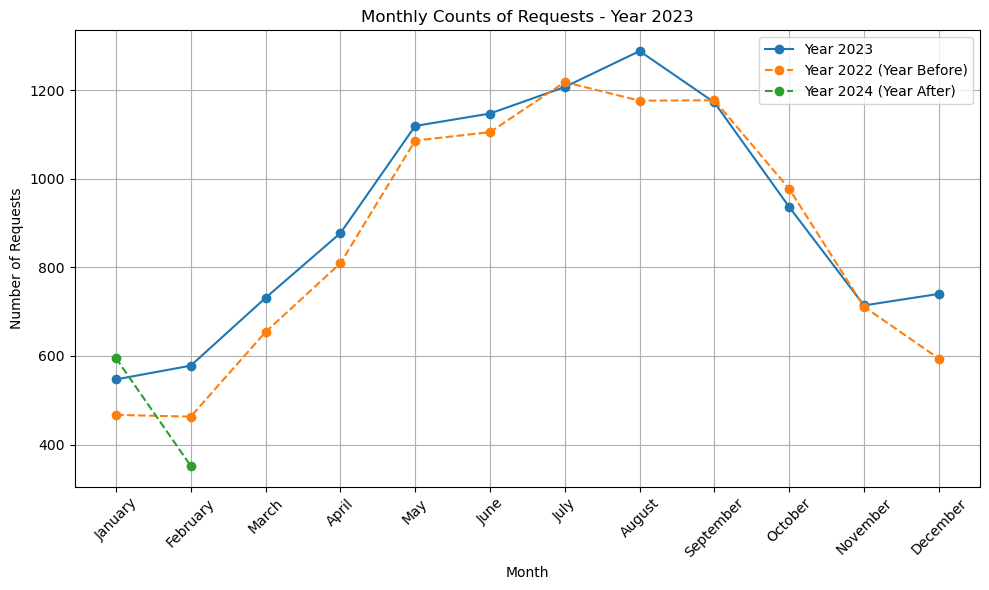

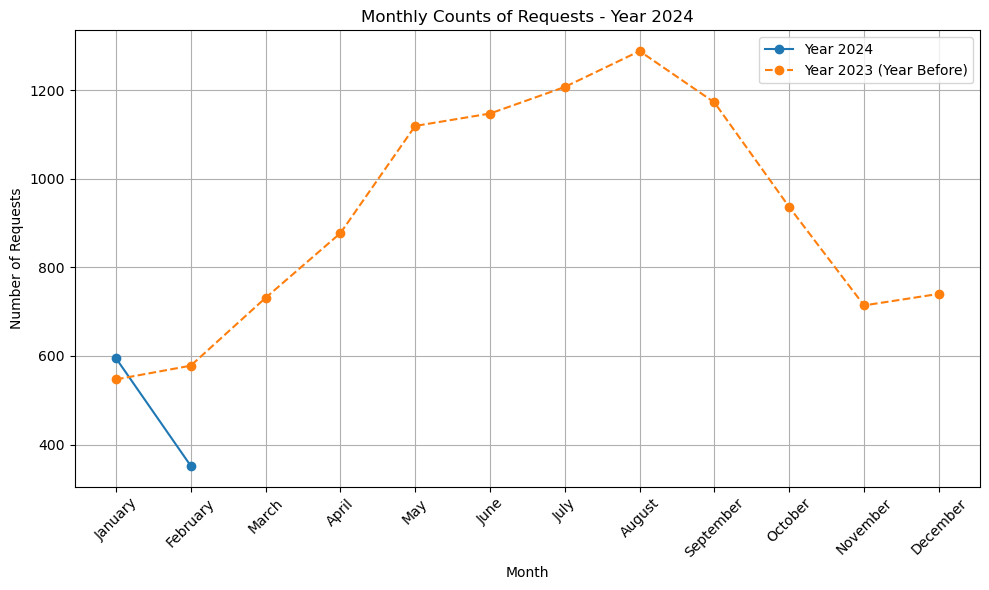

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert the 'open_dt' column to datetime type
df['open_dt'] = pd.to_datetime(df['open_dt'])

# Extract the year from the 'open_dt' column
df['year'] = df['open_dt'].dt.year

# Loop through each year and save the corresponding plot for monthly counts
for year in df['year'].unique():
    # Filter data for the current year
    year_data = df[df['year'] == year]
    
    # Extract the month from the 'open_dt' column and map it to month names
    year_data['month'] = year_data['open_dt'].dt.month_name()

    # Define the order of months
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Bucket count of requests based on the month
    monthly_counts = year_data['month'].value_counts().sort_index()

    # Plot the monthly counts as line graphs for the current year
    plt.figure(figsize=(10, 6))
    plt.plot(month_order, monthly_counts.reindex(month_order), marker='o', label=f'Year {year}')
    
    # Add trend from the year before
    if year - 1 in df['year'].unique():
        year_before_data = df[df['year'] == year - 1]
        monthly_counts_before = year_before_data['month'].value_counts().sort_index()
        plt.plot(month_order, monthly_counts_before.reindex(month_order), marker='o', linestyle='--', label=f'Year {year - 1} (Year Before)')

    # Add trend from the year after
    if year + 1 in df['year'].unique():
        year_after_data = df[df['year'] == year + 1]
        monthly_counts_after = year_after_data['month'].value_counts().sort_index()
        plt.plot(month_order, monthly_counts_after.reindex(month_order), marker='o', linestyle='--', label=f'Year {year + 1} (Year After)')

    plt.title(f'Monthly Counts of Requests - Year {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Requests')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Annotate points with percentages
  #  total_requests_monthly = monthly_counts.sum()
  #  for i, v in enumerate(monthly_counts.reindex(month_order)):
  #      percentage = (v / total_requests_monthly) * 100
   #     plt.text(i, v + 5, f'{percentage:.2f}%', ha='center')

    plt.savefig(f'countPerMonth_{year}.png')  # Save the graph as an image
    #plt.show()
